### Importing libraries, loading data and Data cleaning

In [891]:
##Loading required basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

In [892]:
##Loading data
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [893]:
##Checking for null values
(df.isnull().sum())/len(df)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [894]:
## Society has more null values, will explore this further

df['society'].value_counts(dropna=False)

NaN        5502
GrrvaGr      80
PrarePa      76
Sryalan      59
Prtates      59
           ... 
Teilsaf       1
Saave R       1
Shentpa       1
May 2ge       1
Diaste        1
Name: society, Length: 2689, dtype: int64

In [895]:
## Fill 5502 NaN values with 'other'

df['society'] = df['society'].fillna('Other')

In [896]:
## Using label encoder. Label encoding is simply converting each value in a column to a number.
from sklearn.preprocessing import LabelEncoder

In [897]:
le = LabelEncoder()

In [898]:
le.fit(df['society'])
df['society'] = le.transform(df['society'])

In [899]:
## Nearly 50% data is missing in 'society' column and we can see that location and society is related
## df.loc[df['society']=='Sryalan','location' ].head(30)

In [900]:
##df.drop('society', axis=1, inplace=True)

In [901]:
##Checking for null values
(df.isnull().sum())/len(df)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.000000
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [902]:
##Analyse 'balcony' column

In [903]:
df['balcony'].value_counts(dropna=False)

2.0    5113
1.0    4897
3.0    1672
0.0    1029
NaN     609
Name: balcony, dtype: int64

In [904]:
##We can see some correlation
df.corr()['price'].sort_values()

society   -0.006801
balcony    0.120355
bath       0.456345
price      1.000000
Name: price, dtype: float64

In [905]:
## Balcony might be related to other features like size, total_sqft. Will perform data cleaning on 
## other features and then analyse balcony

In [906]:
##Cleaning 'total_sqft'

df['total_sqft'].isnull().sum()

0

In [907]:
df['total_sqft'].unique().tolist()

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '2100 - 2850',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '1330.74',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '3010 - 3410',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '2957 - 3450',
 '1326',
 '1325',
 '1499',
 '1665',
 '708',
 '1060',
 '710',
 '1450',
 '2894',
 '1330',
 '2502',
 '650',
 '2400',
 '1007',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '1413',
 '1116',
 '1530',
 '3700',
 '2497',
 '1436',
 '276',
 '1427',
 '2061',
 '3067 - 8156',
 '2650',
 '1282',
 '1050',
 '945',
 '950'

In [908]:
## 'total_sqft' contains values like '1004 - 1204','361.33Sq. Yards'

def sqft(col):
    try:
        float(col)
    except:
        return False
    return True

In [909]:
df[~df['total_sqft'].apply(sqft)].head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,1106,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,327,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,774,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,1864,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,2546,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1035,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1145,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,980,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,1447,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,2112,1195 - 1440,2.0,0.0,63.770


In [910]:
## Replacing '-' with mean value

def sqft_mean(col):
    a = col.split('-')
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(col)
    except:
        return col

In [911]:
df['total_sqft'] = df['total_sqft'].apply(sqft_mean)

In [912]:
df[~df['total_sqft'].apply(sqft)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,1447,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,1447,4125Perch,9.0,NaN,265.00
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,1447,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,1447,1100Sq. Yards,2.0,NaN,45.00
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,1447,5.31Acres,1.0,0.0,110.00
1086,Plot Area,19-Mar,Narasapura,2 Bedroom,1447,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,1447,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,454,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,2239,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,896,1574Sq. Yards,3.0,1.0,76.00


In [913]:
def convert_to_sqft(col):
    if 'Sq. Yards' in str(col):
        a = col.split('Sq.')[0]
        return float(a)*9
    elif 'Acres' in str(col):
        b = col.split('Acres')[0]
        return float(b)*43560
    elif 'Guntha' in str(col):
        c = col.split('Guntha')[0]
        return float(c)*1088.9848169
    elif 'Cents' in str(col):
        d = col.split('Cents')[0]
        return float(d)*435.6
    elif 'Perch' in str(col):
        e = col.split('Perch')[0]
        return float(e)*272.25
    elif 'Grounds' in str(col):
        f = col.split('Grounds')[0]
        return float(f)*2400.38406145
    elif 'Sq. Meter' in str(col):
        g = col.split('Sq.')[0]
        return float(g)*10.76391042
    else:
        return col

In [914]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)

In [915]:
df[~df['total_sqft'].apply(sqft)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [916]:
df[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,227,1800.0,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,1442,3817.0,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,1447,2400.0,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,220,1800.0,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,99,1950.0,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,644,3752.5,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,1881,2324.0,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,1791,1500.0,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,1812,1730.0,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,1447,5000.0,NaN,NaN,400.000


In [917]:
## Above 16 rows contain NaN values for size, bath and balcony, so we will drop these rows
df = df[df['size'].notna()]

In [918]:
df.isnull().sum()

area_type         0
availability      0
location          1
size              0
society           0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [919]:
## 'Size' is number of bedrooms. 4BHK or 4 Bedroom is same. We will clean this and covert to int
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0])).copy()

In [920]:
## As we have created 'bhk' from 'size', will drop 'size'
df = df.drop('size', axis=1)

In [921]:
df.isnull().sum()

area_type         0
availability      0
location          1
society           0
total_sqft        0
bath             57
balcony         593
price             0
bhk               0
dtype: int64

In [922]:
## Categorizing 'availability' column. Ready To Move=0, others=1

df['availability'].value_counts(dropna=False)

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Nov               1
16-Jul               1
15-Aug               1
16-Jan               1
Name: availability, Length: 80, dtype: int64

In [923]:
def availability_cat(col):
    if col=='Ready To Move':
        return 0
    else:
        return 1

In [924]:
df['availability'] = df['availability'].apply(availability_cat)

In [925]:
##Dropping 'availability' feature
##df.drop('availability', axis=1, inplace=True)

In [926]:
df[df['location'].isnull()]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
568,Super built-up Area,0,NaN,801,1600.0,3.0,2.0,86.0,3


In [927]:
## Will drop above 1 row having null value
df.drop([568], inplace=True)

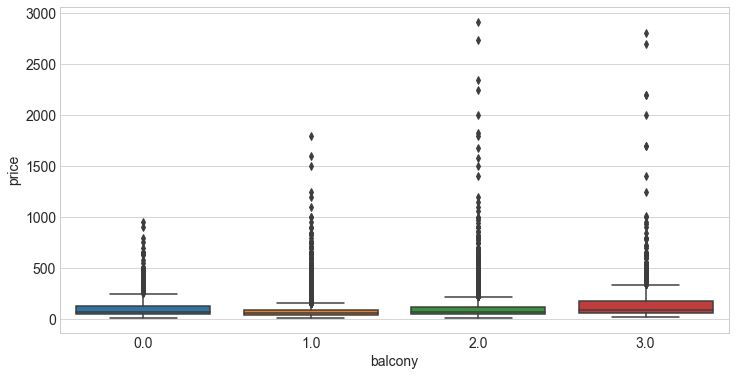

In [928]:
## Handling missing values in 'balcony'
sns.boxplot(x='balcony', y='price', data=df)

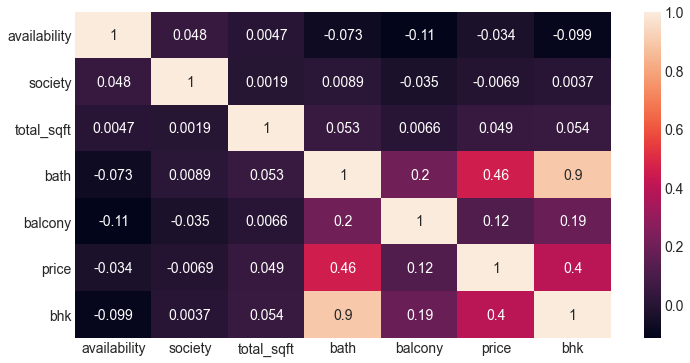

In [929]:
sns.heatmap(df.corr(), annot=True)

In [930]:
df.corr()['balcony'].sort_values(ascending=False)

balcony         1.000000
bath            0.204191
bhk             0.187285
price           0.120363
total_sqft      0.006551
society        -0.034552
availability   -0.114160
Name: balcony, dtype: float64

In [931]:
##there is some correlation between 'balcony' and 'bath'. We will handle missing values in 'bath'
## and then look at 'balcony'

In [932]:
## High correlation between 'bath' and 'bhk'
df.corr()['bath'].sort_values(ascending =False)

bath            1.000000
bhk             0.898408
price           0.456350
balcony         0.204191
total_sqft      0.053100
society         0.008876
availability   -0.072618
Name: bath, dtype: float64

In [933]:
df[['bath','bhk']]

,bath,bhk
0,2.0,2
1,5.0,4
2,2.0,3
3,3.0,3
4,2.0,2
...,...,...
13315,4.0,5
13316,5.0,4
13317,2.0,2
13318,4.0,4


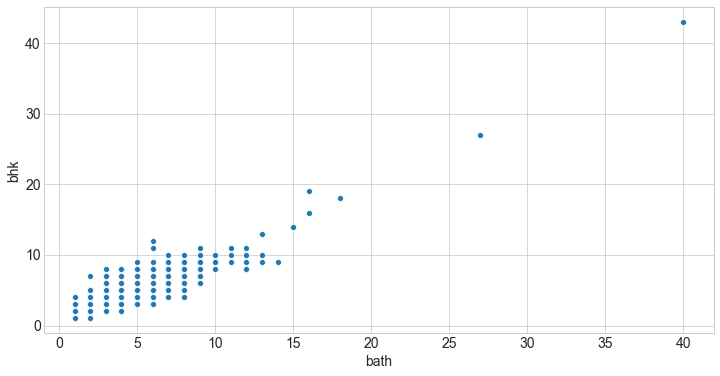

In [934]:
sns.scatterplot('bath', 'bhk', data=df)

In [935]:
df.groupby('bhk')['bath'].mean()

bhk
1      1.061633
2      1.980640
3      2.763038
4      4.086022
5      4.708215
6      5.583710
7      6.360000
8      7.303371
9      8.648148
10    10.071429
11     9.500000
12     6.000000
13    13.000000
14    15.000000
16    16.000000
18    18.000000
19    16.000000
27    27.000000
43    40.000000
Name: bath, dtype: float64

In [936]:
## Replaced missing 'bath' values with mean value
df['bath'] = df.groupby('bhk')['bath'].apply(lambda x:x.fillna(round(x.mean())))

In [937]:
df.isnull().sum()

area_type         0
availability      0
location          0
society           0
total_sqft        0
bath              0
balcony         593
price             0
bhk               0
dtype: int64

In [938]:
df.corr()['balcony'].sort_values(ascending=False)

balcony         1.000000
bath            0.204191
bhk             0.187285
price           0.120363
total_sqft      0.006551
society        -0.034552
availability   -0.114160
Name: balcony, dtype: float64

In [939]:
df.groupby('bath')['balcony'].mean()

bath
1.0     0.788804
2.0     1.485367
3.0     1.869634
4.0     1.781588
5.0     1.760465
6.0     1.844262
7.0     1.951220
8.0     1.833333
9.0     2.000000
10.0    2.333333
11.0    0.000000
12.0    0.000000
13.0    0.000000
14.0         NaN
15.0    0.000000
16.0         NaN
18.0         NaN
27.0    0.000000
40.0    0.000000
Name: balcony, dtype: float64

In [940]:
df[df['bath']==18]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
11559,Plot Area,1,1Kasavanhalli,822,1200.0,18.0,NaN,200.0,18


In [941]:
## balcony with more that 10 bath is having 0 value. so handle the NaN values from above table we are
## replacing NaN with 0 for bath>10

def balcony(col1, col2):
    if col1 >10:
        col2=0
        return col2
    else:
        return col2            

In [942]:
df['balcony'] = df.apply(lambda x : balcony(x['bath'], x['balcony']), axis=1)

In [943]:
df.isnull().sum()

area_type         0
availability      0
location          0
society           0
total_sqft        0
bath              0
balcony         579
price             0
bhk               0
dtype: int64

In [944]:
## Replaced missing 'balcony' values with mean value

df['balcony'] = df.groupby('bath')['balcony'].apply(lambda x:x.fillna(round(x.mean())))

In [945]:
df.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

### Feature Engineering

In [946]:
df.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1,Electronic City Phase II,464,1056.0,2.0,1.0,39.07,2
1,Plot Area,0,Chikka Tirupathi,2440,2600.0,5.0,3.0,120.00,4
2,Built-up Area,0,Uttarahalli,1447,1440.0,2.0,3.0,62.00,3


In [947]:
## Will add new column price per sqft
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [948]:
df.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1,Electronic City Phase II,464,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,0,Chikka Tirupathi,2440,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,0,Uttarahalli,1447,1440.0,2.0,3.0,62.00,3,4305.555556


In [949]:
df['location'].value_counts()

Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
KPC Layout               1
RBI Layout               1
M C Layout               1
Sector 3 HSR Layout      1
St Thomas Town           1
Name: location, Length: 1304, dtype: int64

In [950]:
## Most of locations like 'KPC Layout','M C Layout' is present only once, we will add them to 'other' category 
df['location'].nunique()

1304

In [951]:
df['location'] = df['location'].apply(lambda x:x.strip())

In [952]:
loc = df.groupby('location')['location'].count().sort_values(ascending = False)

In [953]:
loc = loc[loc<=10]

In [954]:
df['location'] = df['location'].apply(lambda x: 'other' if x in loc else x)

In [955]:
df['location'].nunique()

242

### Outlier removal

In [956]:
df.sample(10)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
11103,Super built-up Area,0,KR Puram,1898,1096.0,2.0,1.0,43.0,2,3923.357664
9226,Super built-up Area,0,Whitefield,40,1600.0,3.0,2.0,95.0,3,5937.500000
4280,Super built-up Area,0,Kenchenahalli,191,1015.0,2.0,2.0,58.0,2,5714.285714
9368,Built-up Area,0,Begur,201,1306.0,2.0,3.0,65.0,2,4977.029096
8231,Super built-up Area,0,other,1447,1450.0,2.0,1.0,65.0,3,4482.758621
1263,Super built-up Area,1,Tumkur Road,2018,1586.0,3.0,1.0,100.0,3,6305.170240
6548,Super built-up Area,0,5th Phase JP Nagar,1264,1000.0,2.0,0.0,48.0,2,4800.000000
9072,Super built-up Area,0,Varthur,524,1035.0,2.0,1.0,60.0,2,5797.101449
1919,Super built-up Area,0,Jigani,481,920.0,2.0,2.0,46.0,2,5000.000000
2504,Super built-up Area,0,Kanakpura Road,1447,1077.0,2.0,1.0,37.7,2,3500.464253


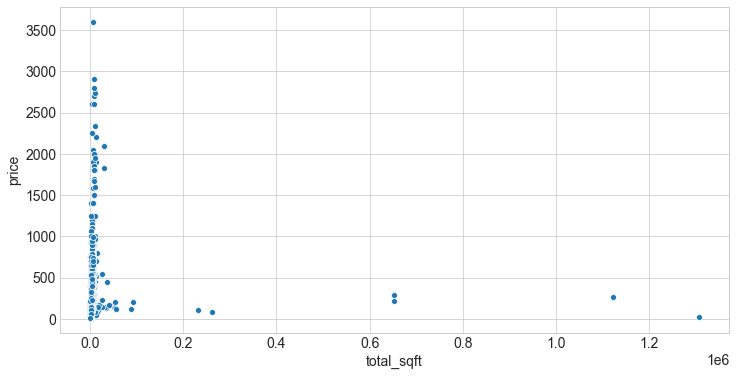

In [957]:
sns.scatterplot('total_sqft', 'price', data=df)

In [958]:
df['total_sqft'].sort_values(ascending =False).head(10)

1086     1306800.00
648      1123031.25
7001      653400.00
7607      653400.00
11615     261360.00
1019      231303.60
6333       91040.40
7334       87120.00
7726       54885.60
10488      54450.00
Name: total_sqft, dtype: float64

In [959]:
## These values are outliers and may impact model performance
df[(df['total_sqft']>200000)]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
648,Built-up Area,0,Arekere,1447,1123031.25,9.0,2.0,265.0,9,23.596850
1019,Plot Area,1,other,1447,231303.60,1.0,0.0,110.0,1,47.556545
1086,Plot Area,1,other,1447,1306800.00,2.0,2.0,29.5,2,2.257423
7001,Plot Area,0,Thyagaraja Nagar,1447,653400.00,6.0,2.0,290.0,8,44.383226
7607,Plot Area,0,Bommenahalli,1615,653400.00,3.0,1.0,217.0,3,33.210897
11615,Plot Area,0,other,1447,261360.00,2.0,0.0,80.0,3,30.609122


In [990]:
## removing above rows and adding to new df
df1 = df[~(df['total_sqft']>200000)]

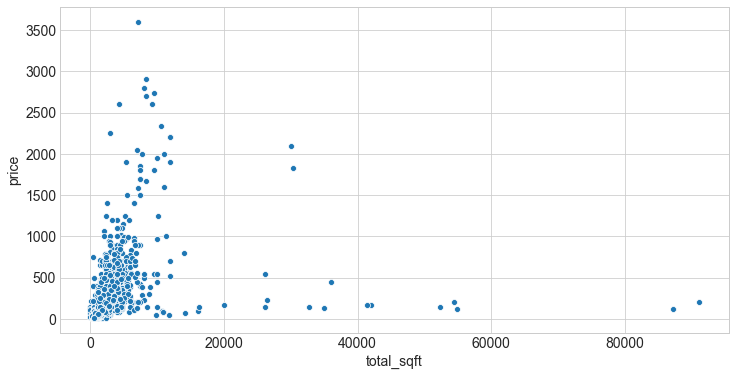

In [991]:
sns.scatterplot('total_sqft', 'price', data=df1)

In [992]:
df1.shape

(13297, 10)

In [993]:
## Standard bedroom size in India is 144sqft. Small room has 100sqft and large room has around 250sqft
## Filtering vlaues having room size less than 150sqft
df1 = df1[~(df1['total_sqft']/df1['bhk']<150)]

In [994]:
df1['price_per_sqft'] = df1['price_per_sqft'].astype('float')

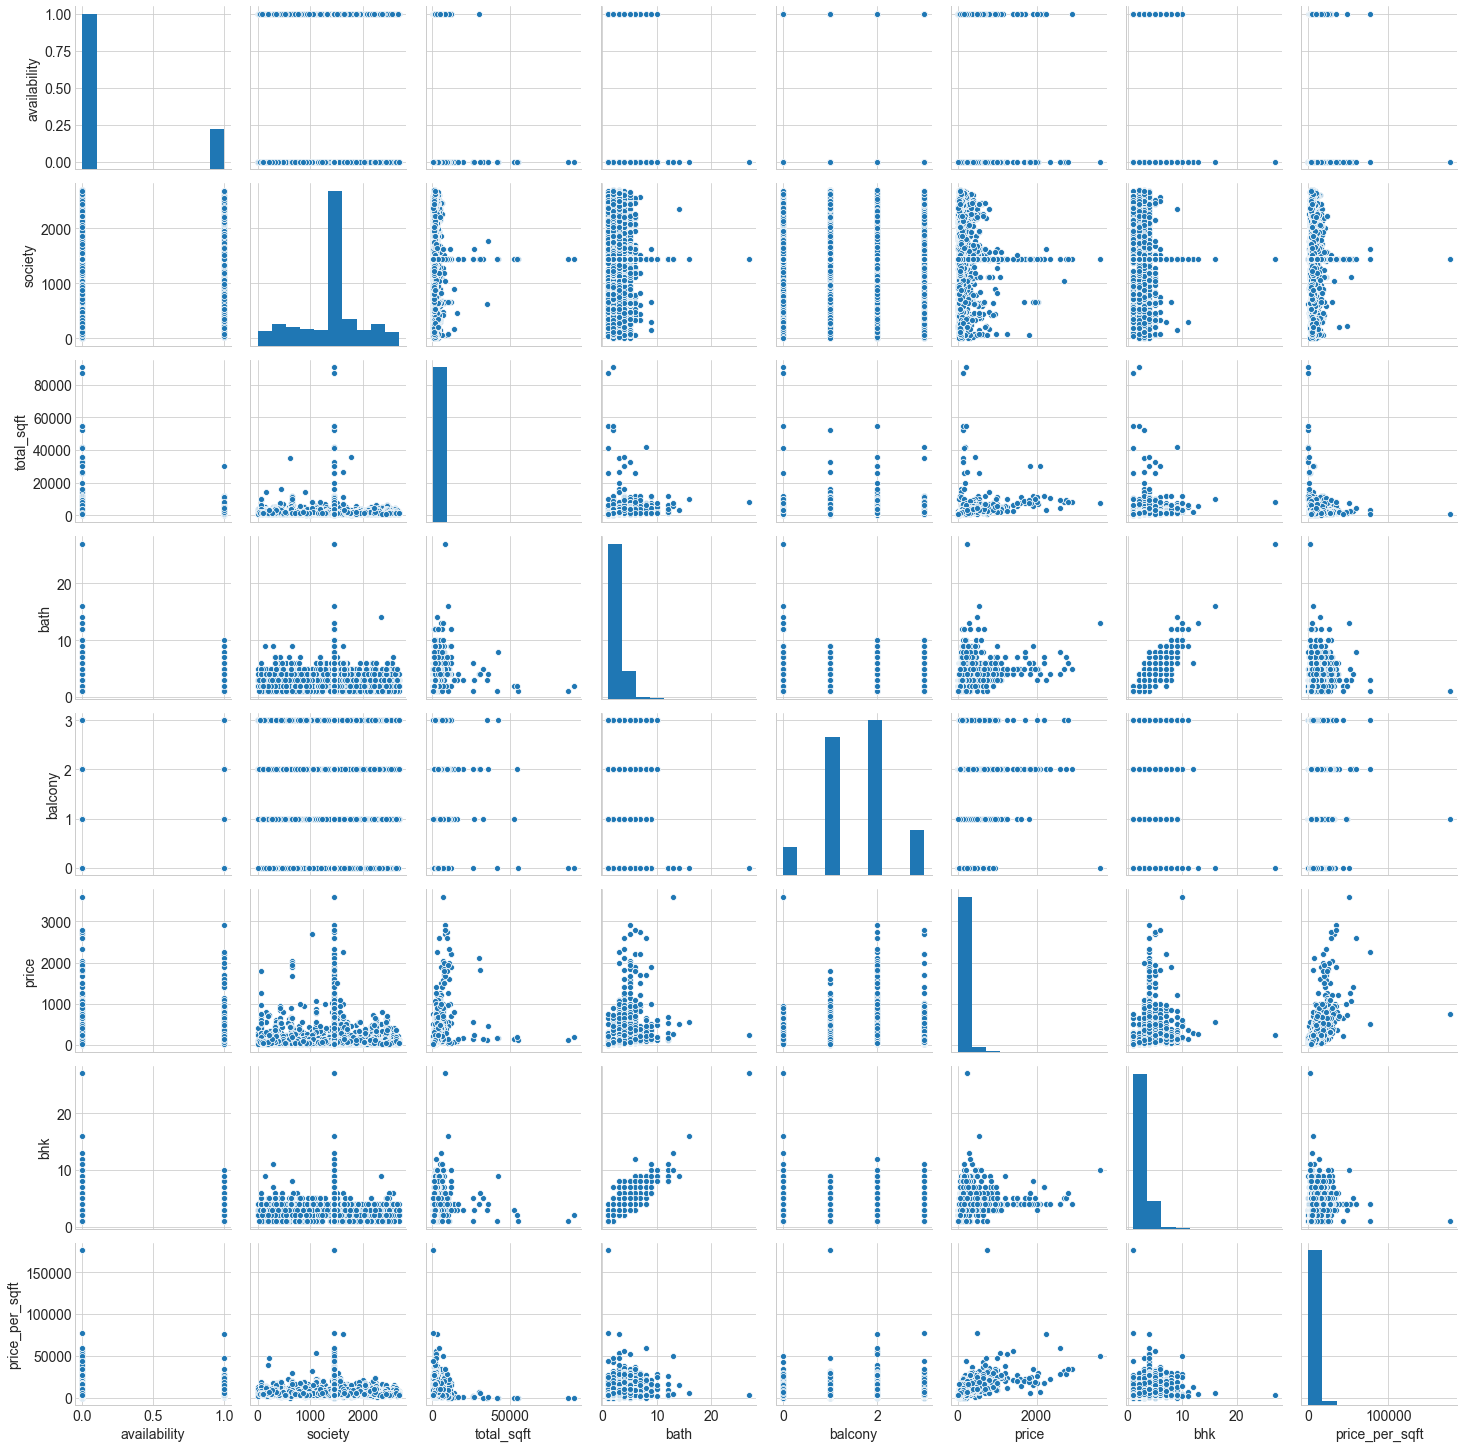

In [995]:
sns.pairplot(df1)

In [996]:
df['price_per_sqft'].describe()

count    1.330300e+04
mean     7.907398e+03
std      1.063169e+05
min      2.257423e+00
25%      4.263483e+03
50%      5.433830e+03
75%      7.313544e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [997]:
## Using standard deviation method to remove outliers
def remove_outlier(df):
    df_out = pd.DataFrame()
    for i, sdf in df.groupby('location'):
        m = np.mean(sdf['price_per_sqft'])
        s = np.std(sdf['price_per_sqft'])
        rdf = sdf[(sdf['price_per_sqft']>(m-s)) & (sdf['price_per_sqft']<(m+s))]
        df_out = pd.concat([df_out, rdf], ignore_index=True)
    return df_out

In [998]:
df1 = remove_outlier(df1)

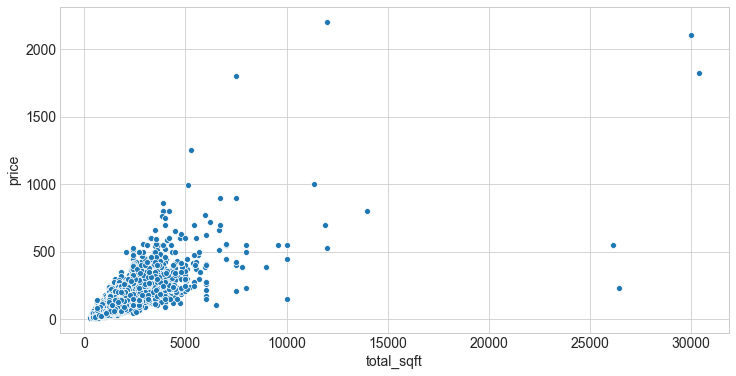

In [999]:
sns.scatterplot('total_sqft', 'price', data=df1)

In [1000]:
def plot_scatter_bhk(df, location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'],color = 'blue', marker='o', label="2BHK")
    plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'],color = 'red', marker='*', label="3BHK")
    plt.xlabel('Total Sqft')
    plt.ylabel('Price per sqft')
    plt.legend()

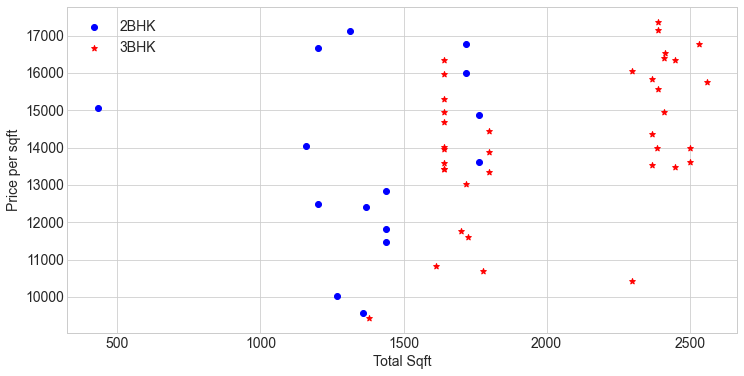

In [1001]:
## Price per sqft of 2bhk is more than 3bhk
plot_scatter_bhk(df1, 'Rajaji Nagar')

In [1002]:
## Price per sqft of 2bhk is more than 3bhk, removing those outliers using below function
def remove_outlier_bhk(df):
    exclude_indices = []
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean':np.mean(bhk_df['price_per_sqft']),
                            'std':np.std(bhk_df['price_per_sqft']),
                            'count':bhk_df.shape[0]}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [1003]:
df1 = remove_outlier_bhk(df1)

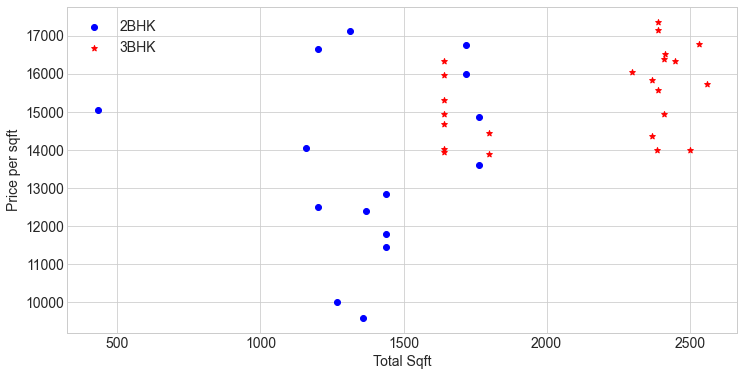

In [1004]:
plot_scatter_bhk(df1, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

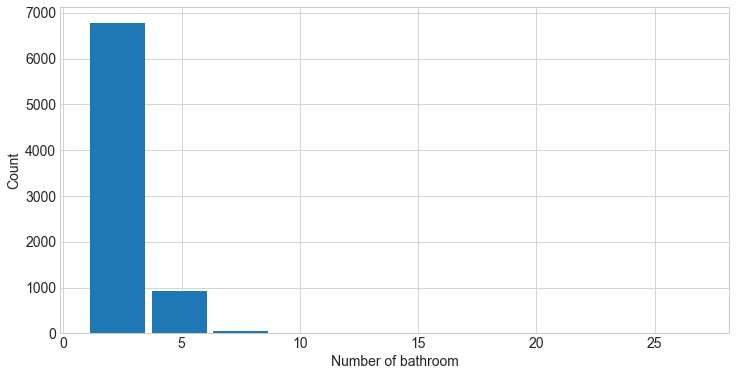

In [1005]:
plt.hist(df1['bath'], rwidth=.9)
plt.xlabel('Number of bathroom')
plt.ylabel('Count')

In [1006]:
##Usually number of bathroom is bedroom+2
df1[df1['bath']>(df1['bhk']+2)]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
1639,Plot Area,0,Chamrajpet,1447,1500.0,9.0,3.0,230.0,6,15333.333333
1776,Built-up Area,0,Chikkabanavar,1447,2460.0,7.0,2.0,80.0,4,3252.032520
5577,Built-up Area,0,Nagasandra,1447,7000.0,8.0,2.0,450.0,4,6428.571429
7117,Super built-up Area,0,Thanisandra,2200,1806.0,6.0,2.0,116.0,3,6423.034330
10248,Plot Area,0,other,1447,1200.0,9.0,3.0,122.0,6,10166.666667


In [1007]:
## removing all rows having bathroom > bedroom+2
df1 = df1[df1['bath']<=(df1['bhk']+2)]

In [1008]:
df1.shape

(7776, 10)

In [1009]:
## Dropping 'price_per_sqft' as it was only added for analysis
df1 = df1.drop('price_per_sqft', axis=1)

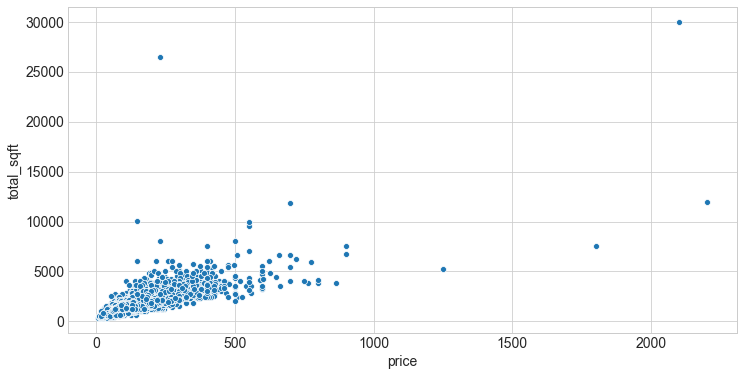

In [1010]:
sns.scatterplot('price','total_sqft', data=df1)

### Model building

In [1011]:
df1.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1,1st Block Jayanagar,1447,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1,1st Block Jayanagar,1447,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1447,1200.0,6.0,2.0,125.0,6
3,Super built-up Area,0,1st Block Jayanagar,1447,1875.0,2.0,3.0,235.0,3
4,Built-up Area,1,1st Block Jayanagar,312,1200.0,2.0,0.0,130.0,3


In [1012]:
## one hot encoding for area_type
area = pd.get_dummies(df1['area_type'], drop_first=True)

In [1013]:
df1 = pd.concat([df1, area], axis=1)

In [1014]:
## one hot encoding for location
loca = pd.get_dummies(df1['location'])

In [1015]:
df1 = pd.concat([df1, loca.drop('other', axis=1)], axis=1)

In [1016]:
## Drop 'area_type' and 'location' column
df1 = df1.drop(['area_type', 'location'], axis=1)

In [1017]:
##Dropped row 1498 as it was outlier impacting model performance 
df1 = df1.drop(1498)

In [1018]:
## Split data into train and test
from sklearn.model_selection import train_test_split

In [1019]:
X = df1.drop('price', axis=1)
y = df1['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [1020]:
from sklearn.linear_model import LinearRegression

In [1021]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1022]:
model.score(X_test, y_test)

0.83896238346181

In [1023]:
##Use k-fold validation to measure accuracy of our model
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [1024]:
score = []

for i in range(1,15):
    cv = ShuffleSplit(n_splits=i, test_size=0.2, random_state=101)
    score = cross_val_score(LinearRegression(), X,y, cv=cv)

In [1025]:
## With 15 iterations we are getting score above 80% all time
score

array([0.83896238, 0.80021904, 0.80421345, 0.81346536, 0.85565189,
       0.79340216, 0.84817124, 0.85309673, 0.83518469, 0.81238186,
       0.80015061, 0.87497211, 0.8336408 , 0.85365966])

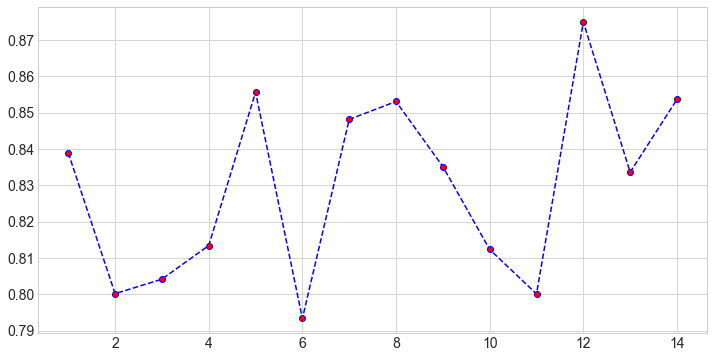

In [1026]:
plt.plot(range(1,15), score, marker='o', color='blue', ls='--',markerfacecolor='red')

In [1027]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [1042]:
## Finding best model
def find_best_model_gs(X,y):
    algos = {
        'Linear Regression':{
            'model':LinearRegression(),
            'param':{
                'normalize':[True, False]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'param':{
                'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
            }
        },
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
            'param':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Ridge':{
            'model':Ridge(),
            'param':{
                'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=15, test_size=0.2, random_state=101)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['param'], cv=cv)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'score':gs.best_score_,
            'Param': gs.best_params_
        })
    return pd.DataFrame(score)
find_best_model_gs(X,y)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4110380.2384927254, tolerance: 5431.248677967197
  positive)
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3332360.2220829413, tolerance: 4748.263812090867
  positive)
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3414772.7813364295, tolerance: 4881.130438601711
  positive)
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476:

,model,score,Param
0,Linear Regression,0.830146,{'normalize': True}
1,Lasso,0.830189,{'alpha': 0.001}
2,DecisionTree,0.704563,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Ridge,0.830181,{'alpha': 0.01}


In [1076]:
##Predicting price
def predict_price(location, bhk, bath, sqft):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns),)
    x[2] = sqft
    x[5] = bhk
    x[3] = bath
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [1077]:
predict_price('1st Phase JP Nagar',2, 2, 1000)

78.27036854461694

In [1078]:

predict_price('Indira Nagar',3, 3, 1000)

179.9260269670096

In [1079]:
##Exporting tsted model to pickle file
import pickle
with open('bengaluru_home_price.pickle', 'wb') as f:
    pickle.dump(model,f)

In [1080]:
## Exporting column information
import json
columns = {
    'columns':[col.lower() for col in X.columns]
}

with open('column.json', 'w') as f:
    f.write(json.dumps(columns))